# <center><h2> Predict the Survival of Titanic Passengers </h1></center>

# Problem Description: 

### Given a dataset containing different features descibing the details of passengers on the Titanic ship:
    - Explore the dataset using relevant vizulization techniues to discuss: 
        - Any interesting findings/patterns in the dataset
        - Plots to descirbe the featues
    - Develop a base model to predict the survival of the passengers, summarized according to economic status      (class), sex, age and survival. 

#### Note:

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

### Happy Coding!!

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/train.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [19]:
train_data = pd.read_csv('C://Users/rtd91//train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data = pd.read_csv("C://Users//rtd91//test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Task 1: Data Exploration and vizulization

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
mean=np.mean(train_data["Age"])

In [23]:
train_data[train_data["Age"].isna()]["Age"]=np.mean(train_data["Age"])

C:\Users\rtd91\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
train_nan=pd.DataFrame(train_data[train_data["Age"].isna()]["Age"])

In [41]:
train_nan["Age"].replace("NaN",mean,inplace=True)

In [52]:
from sklearn.preprocessing import LabelEncoder as le
import seaborn as sns

In [53]:
S=train_data["Sex"].value_counts()

In [48]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

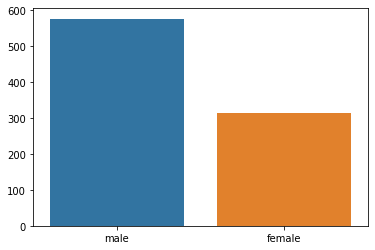

In [57]:
sns.barplot(x=S.index,y=S.values)

In [58]:
train_data["Ticket"].value_counts()

1601             7
347082           7
CA. 2343         7
347088           6
CA 2144          6
                ..
345783           1
PC 17759         1
13568            1
324669           1
SC/Paris 2163    1
Name: Ticket, Length: 681, dtype: int64


## Task 2: Modeling -  Create a base model




In [62]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
Y=train_data["Survived"]

In [67]:
X=train_data.columns

In [73]:
X

,0
0,PassengerId
1,Survived
2,Pclass
3,Name
4,Sex
5,Age
6,SibSp
7,Parch
8,Ticket
9,Fare


In [70]:
X=pd.DataFrame(X)

In [72]:
X.drop(["PassengerId","Survived","Name","Age","Cabin","Survived"],axis=1)

KeyError: "['PassengerId' 'Survived' 'Name' 'Age' 'Cabin' 'Survived'] not found in axis"